In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

<div class="info">
PH2150- Scientific Computing Skills

## Chapter 5:  multidimensional data arrays


The `numpy` package is used in almost all numerical computation using *Python*. If you are looking at a *Python* textbook and it does not contain a section on *NumPy* then it is probably the wrong book for you. *NumPy* is a package that provides high-performance vector, matrix and higher-dimensional data structures for *Python*. It is implemented in *C* and *Fortran* so when calculations are vectorized (formulated with vectors and matrices), performance can be very fast. 

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is an *array*. And the object that is created is the numpy.ndarray (N-dimensional array).

These notes contain a brief introduction to some of the properties and usage of the `numpy` array, for a more complete description:

https://docs.scipy.org/doc/numpy/index.html

Here we will look at:

* The structure of an array
* Creating an array
* Manipulating arrays (indexing and slicing)


To use `numpy` you need to import the module, using for example:

In [2]:
import numpy as np # here we use the alias np which is common practice

## The N-dimensional array (ndarray)
* An ndarray is a (usually fixed-size) multidimensional container of items of the same type and size.
* The number of dimensions and items in an array is defined by its shape, which is a tuple of N non-negative integers that specify the sizes of each dimension.
* The type of items in the array is specified by a separate data-type object (dtype), one of which is associated with each ndarray. 
* Figure 1 shows the labelling of the axes of various N-dimensional arrays.

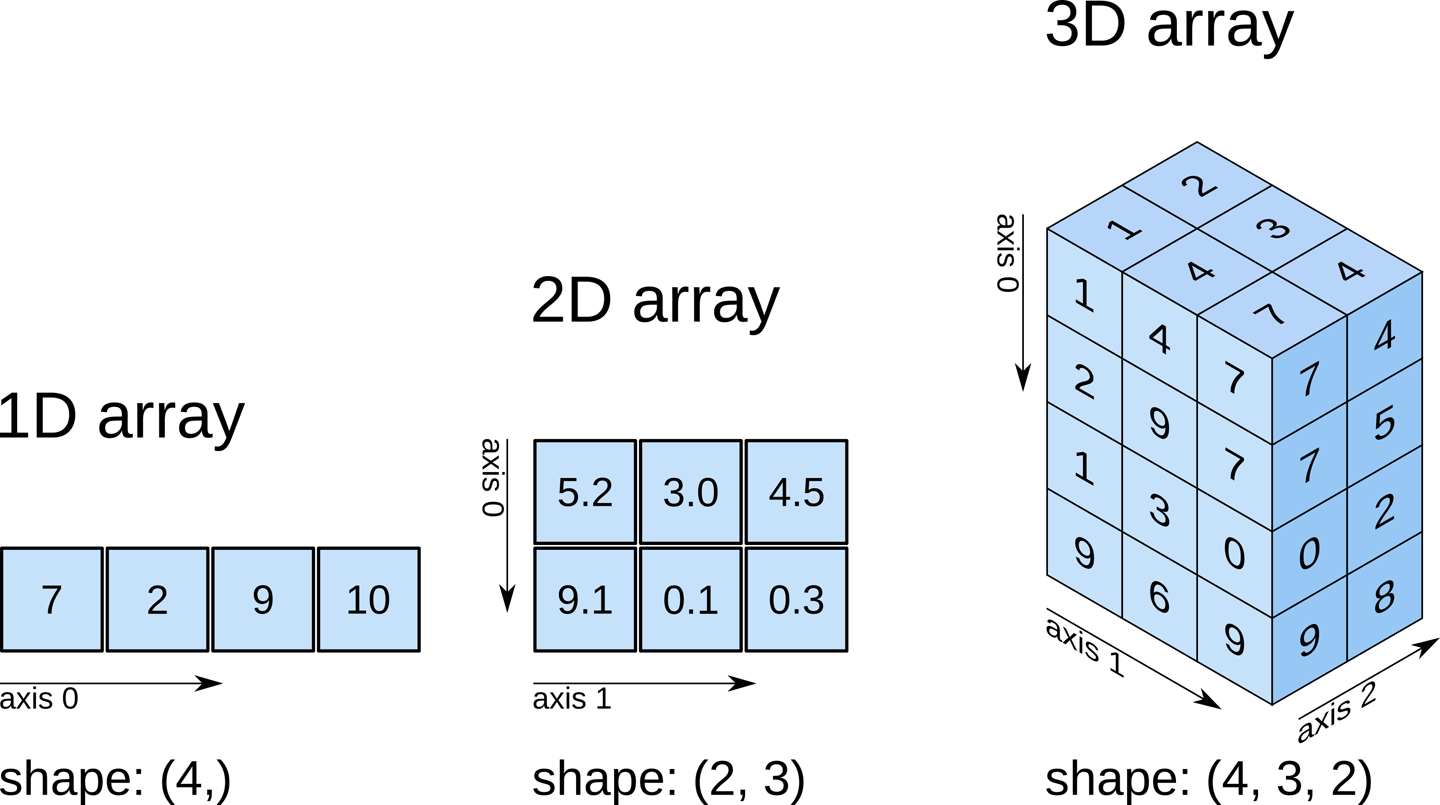

**Figure 1:** Graphical representation of a 1,2, and 3 dimensional array

## Creating `numpy` arrays

There are a number of ways to create new numpy arrays, for example from:

* a *Python* list or tuples
* using functions to generate numpy arrays, such as `np.arange`, `np.linspace`.
* reading data from files, `np.loadtxt()` see Problem sheet 3.

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [3]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])
v


array([1, 2, 3, 4])

In [4]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 5]])
M

array([[1, 2],
       [3, 5]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [5]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [6]:
print ('vshape=',v.shape,'\nMshape=', M.shape) #\n gives new line

vshape= (4,) 
Mshape= (2, 2)


The number of elements in the array is available through the `ndarray.size` property:

In [7]:
print ('v_size=',v.size,'\nM_size=', M.size) #\n gives new line

v_size= 4 
M_size= 4


Equivalently, we could use the function `numpy.shape` and `numpy.size`

In [8]:
print('Shape of M =',np.shape(M),'\nSize of M =',np.size(M))

Shape of M = (2, 2) 
Size of M = 4


Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [9]:
M.dtype,v.dtype

(dtype('int64'), dtype('int64'))

We can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [10]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

print(M)

M.dtype

[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]]


dtype('complex128')

The `numpy.ndarray` has the following properties:

* The number of elements in an array is fixed. 
* You cannot add elements to an array once it is created, or remove them.
* The elements of an array must all be of the same type, such as all floats or all integers. 
* You cannot mix elements of different types in the same array and you cannot change the type of the elements once an array is created.


This is much more restrictive than the *list* data container that we have already seen, why would we ever use an array if lists are more flexible?


* Lists do not support mathematical functions such as matrix and dot multiplications, etc.
* Implementing such functions for Python lists would not be very efficient because of the dynamic typing (the data type at each element can be changed).
* The restriction that Numpy arrays are **statically typed** (fixed when created) and **homogeneous** (all the same data type) allows them to be more memory efficient.
* The static typing, also allows fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays, which can be implemented in a compiled language (C and Fortran is used).

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange

In [11]:
# create a range

x = np.arange(0, 10, 1) # arguments: start, stop, step

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
x = np.arange(-1, 1, 0.1) # arguments: start, stop, step

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### linspace and logspace

In [13]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25) # (start, stop, num=50, endpoint=True, retstep=False, dtype=None)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [14]:
np.logspace(0, 10, 10, base=math.e) # (start, stop, num=50, endpoint=True, base=10.0, dtype=None)

array([1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
       8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
       7.25095809e+03, 2.20264658e+04])

#### mgrid

In [15]:
x, y = np.mgrid[0:5, 0:5] # similar to meshgrid in MATLAB

print ('x=\n',x)

print('\ny=\n',y)

x=
 [[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]

y=
 [[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


#### random data

Numpy contains a sub package `random` that contains many function for generating arrays of random numbers, that we will return to later in the course, below are a few examples.

In [16]:
from numpy import random

In [17]:
# uniform random numbers in [0,1]
random.rand(5,5)

array([[0.65990204, 0.69109324, 0.06937389, 0.41854786, 0.28018134],
       [0.95254095, 0.66317449, 0.59935019, 0.21779249, 0.79783769],
       [0.33314234, 0.4480516 , 0.76798872, 0.15858898, 0.70477829],
       [0.73447591, 0.11245338, 0.2587766 , 0.23395569, 0.6623309 ],
       [0.36705742, 0.4744021 , 0.41278785, 0.20907822, 0.57371399]])

In [18]:
# standard normal distributed random numbers
random.randn(5,5)

array([[ 0.26104422,  2.08304135,  0.5543058 , -2.2038137 ,  0.03223318],
       [-0.72822997, -1.14675505,  0.48722683, -0.19329836,  0.51073818],
       [-2.10052925, -0.44324709,  0.29488098, -0.86898124, -0.34468533],
       [-0.55469755, -1.29016327,  0.24427759, -2.68109756,  1.34760714],
       [-0.5512094 , -0.71483304, -0.66755174, -0.49613549,  2.6101488 ]])

#### zeros and ones

Sometimes you just want to start with an array filled with either just zeros or ones. With a particular shape. As this is quite a common requirement functions are built in to do this.

In [19]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [20]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## Manipulating arrays

### Indexing


We can index elements in an array using square brackets and indices, the indexing of a 2D array can be seen in figure 2:

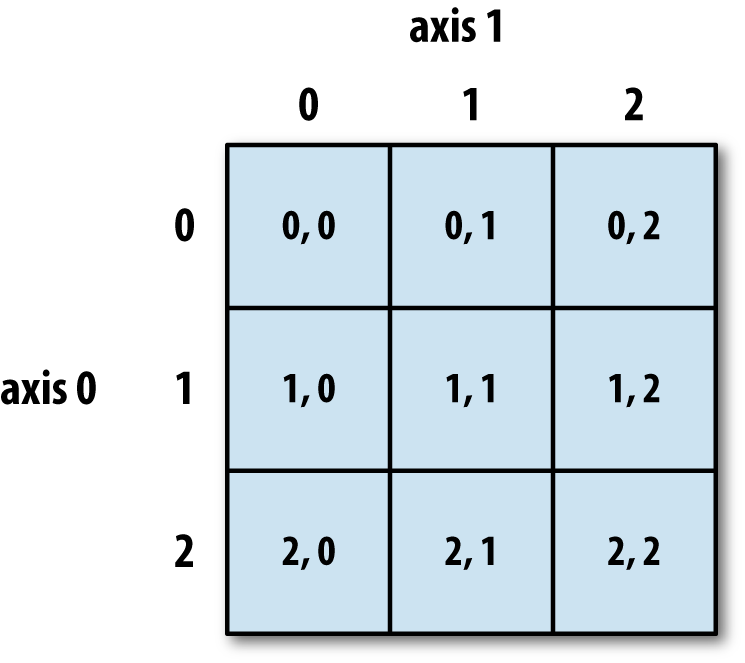

**Figure 2:** The indexing of a 2D array, notice the indices start from 0.

In [21]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

In [22]:
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [23]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

4

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [24]:
M

array([[1, 2],
       [3, 4]])

In [25]:
M[1]

array([3, 4])

The same thing can be achieved with using `:` instead of an index: 

In [26]:
M[1,:] # row 1

array([3, 4])

In [27]:
M[:,1] # column 1

array([2, 4])

We can assign new values to elements in an array using indexing:

In [28]:
M[0,0] = 2

In [29]:
M

array([[2, 2],
       [3, 4]])

In [30]:
# also works for rows and columns
M[1,:] = 0
M[:,1] = -1

In [31]:
M

array([[ 2, -1],
       [ 0, -1]])

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array `M`, figure 3 shows pictorially the result of various slicing operations:


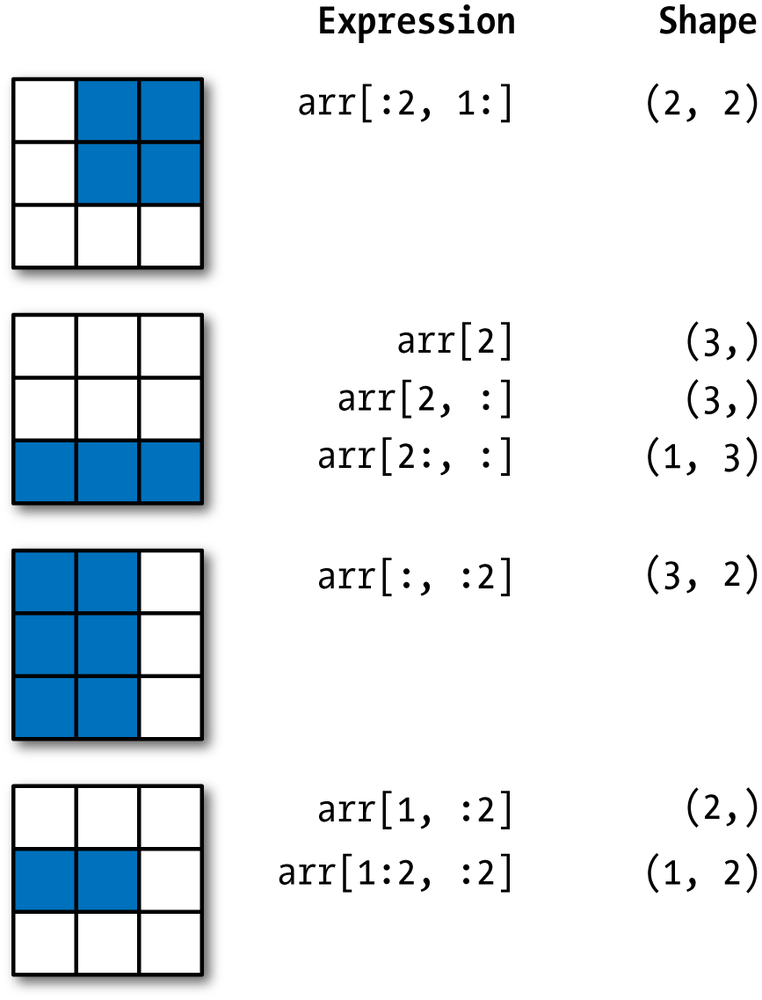

**Figure 3:** Syntax for slices of a 2D array, arr


In [32]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [33]:
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [34]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [35]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [36]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [37]:
A[:3] # first three elements

array([ 1, -2, -3])

In [38]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [40]:
A = np.array([1,2,3,4,5])

In [41]:
A[-1] # the last element in the array

5

In [42]:
A[-3:] # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [44]:
A =np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [45]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [46]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.

## Next Step

Now you can move on [chapter 6](PH2150_Lecture6.ipynb) or return to the [menu](PH2150_Start_here.ipynb)